
# William Fallas

## GreenHouse automation  using Bayesian networks

The main the areas of automation are the followings:

- Pump turn on / off
- Temperature controller with fans
- Fertilizer injection

# GreenHouse Operation

### Irrigation System

#### Fertilizant + Water  = Nutritive Solution


#### Risk Factors


Principal elements to measure

- Temperature

- Humidity

- Perspiration, evaporation

- Water curve Release  from the different substrates

- Application Measurement: Crop requirement



##### Temperature

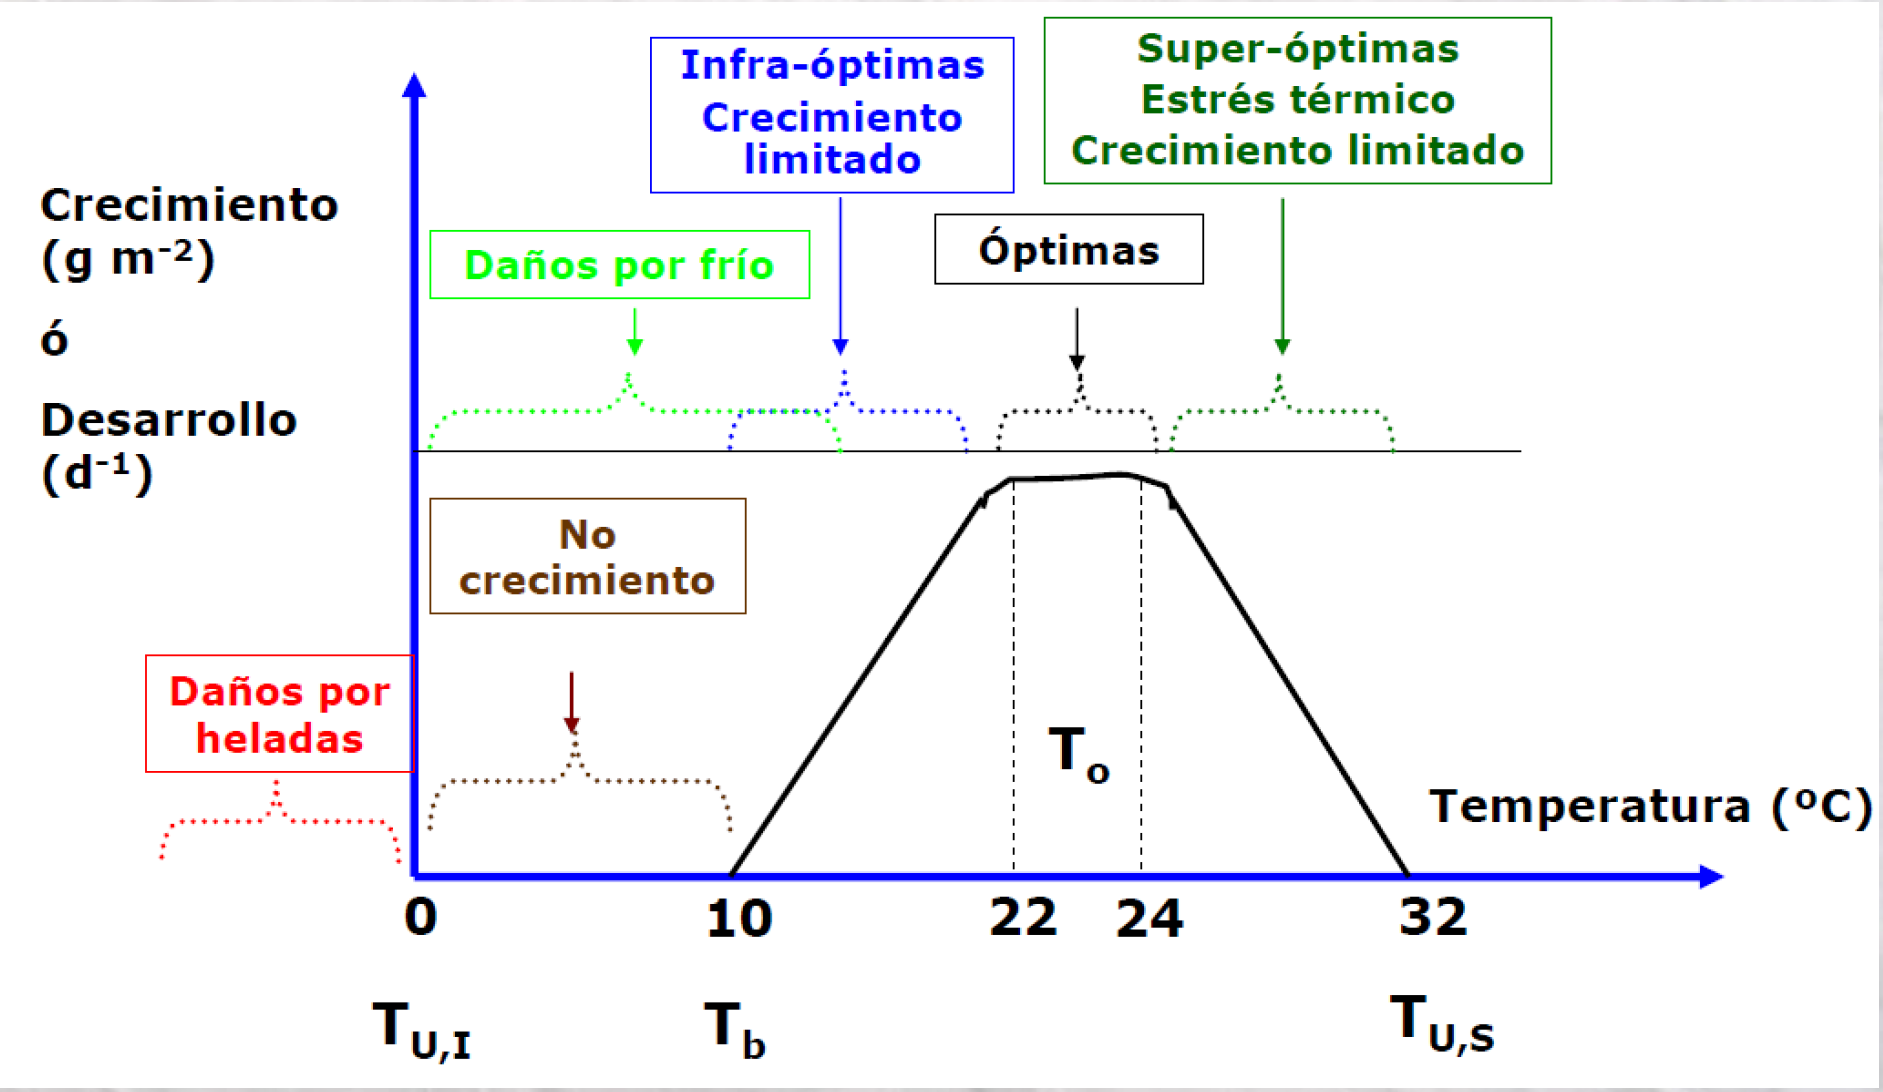

### Injecting nutrients into irrigation

- Nutrient content in irrigation water

- PH

- Measure conductivity in the substrate

- Excess of nutrients increased conductivity (Damage in roots)

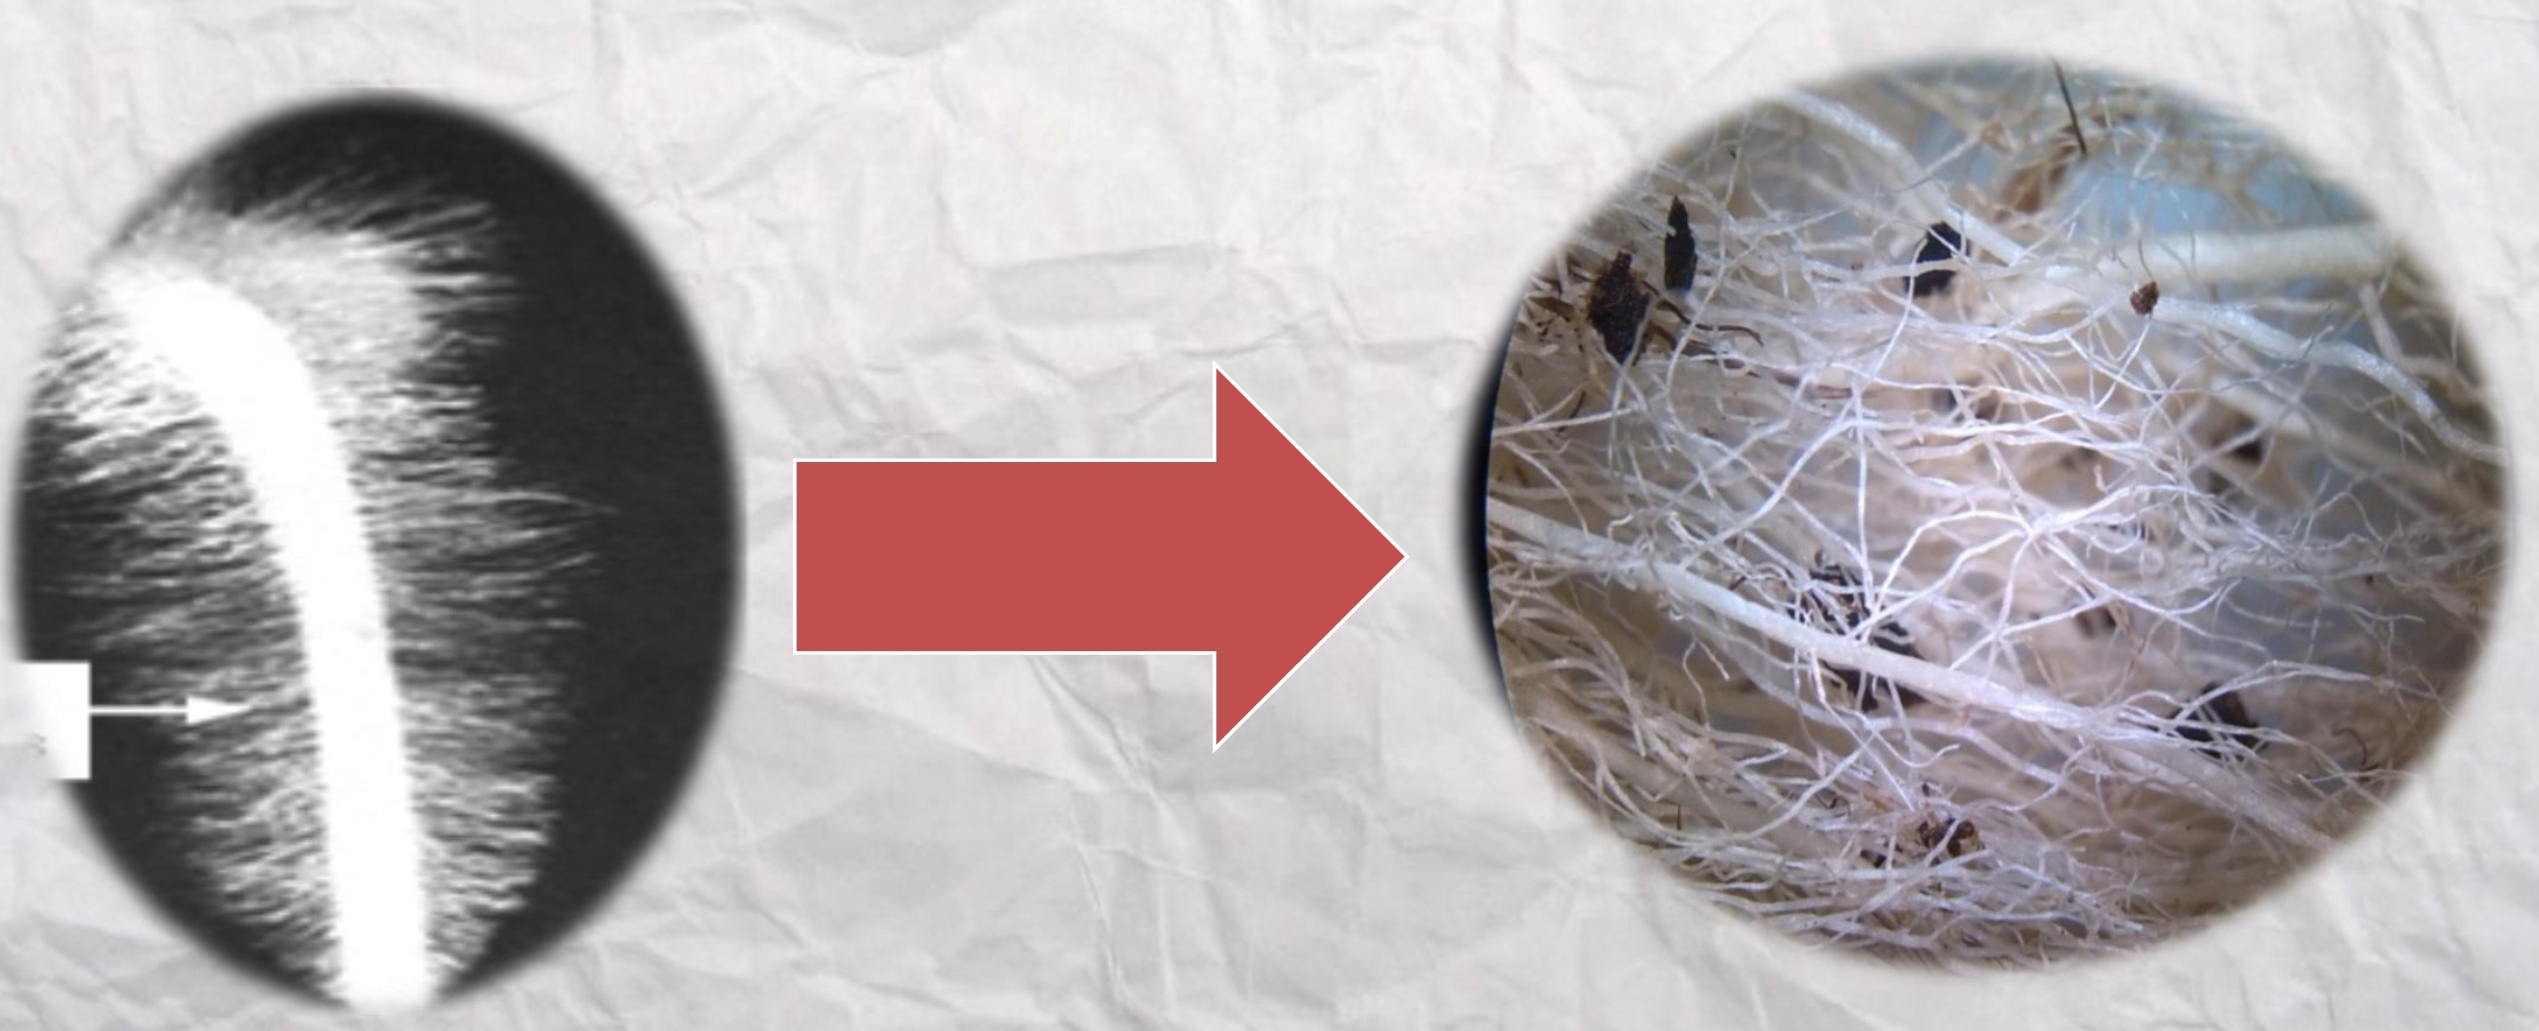

Poor performance and quality

Ej, Blossom end rot, Cracking


# Technology Architecture overview


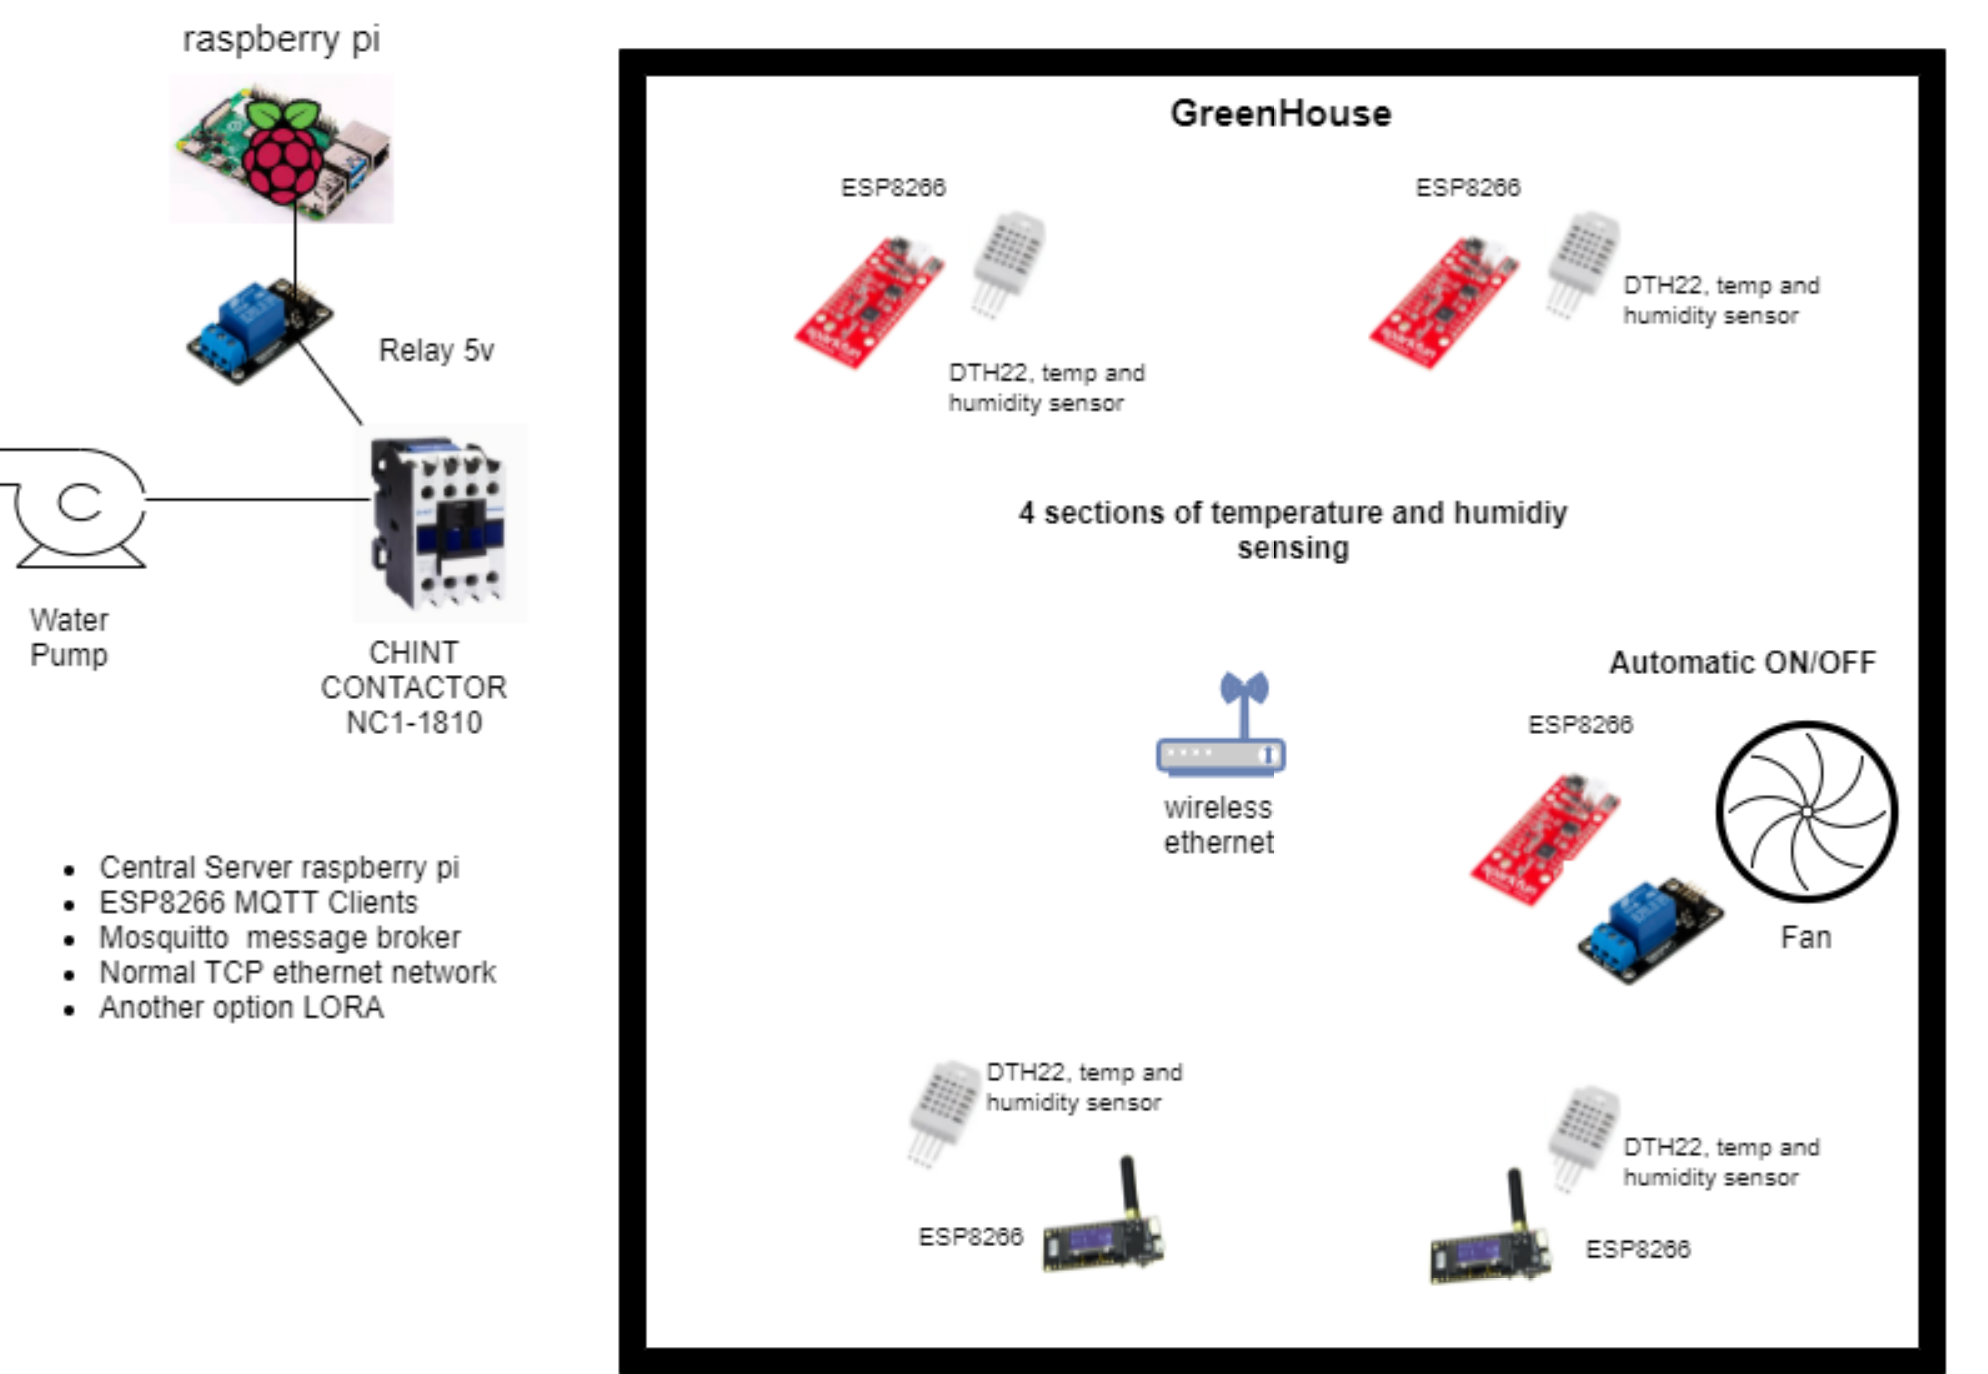

### Components

#### Raspberry pi

#### ESP8266

#### DTH22

#### Relay 5v

#### Chint Contactor

### Working MQTT in Raspberry pi and ESP8266

In order to use MQTT protocol in raspberry and esp8266, it's needed install Mosquitto.

Eclipse Mosquitto is an open source (EPL/EDL licensed) message broker that implements the MQTT protocol

Official site

https://mosquitto.org/

Installation guide

https://pimylifeup.com/raspberry-pi-mosquitto-mqtt-server/

# ESP8266 clients

Two different ESP8266 providers were implemented for humidity and temperature sensing, both of them are MQTT nodes that sends the data to raspberry who acts like the MQTT broker

### SparkFunClient
https://www.sparkfun.com/products/13231



C++ implementation for ESP8266 client, uses RHT03 humidity and temperature sensor and send the data to broker

In [ ]:

#include <SparkFun_RHT03.h>
#include <Arduino.h>
#include <ESP8266WiFi.h>
#include <PubSubClient.h>

#define ESP8266_LED 5
RHT03 rht;

char *str_tmp="";
char *str_Humedad="";

const char *ssid =  "xxxx";   // name of your WiFi network
const char *password =  "xxxxx"; // password of the WiFi network

const char *ID = "ESP_Zona1";  // Name of our device, must be unique
const char *TOPIC_Temp = "invernadero/zona1/temperatura";  
const char *TOPIC_humedad = "invernadero/zona1/humedad"; 
const char *TOPIC_Init = "invernadero/zona1/Init"; 

// Pin definitions
const int RHT03_DATA_PIN = 4;

IPAddress broker(192,168,1,8); // IP address of your MQTT broker 
WiFiClient wclient;

PubSubClient client(wclient); // Setup MQTT client
bool state=0;

void setup_wifi() {
  Serial.print("\nConnecting to ");
  Serial.println(ssid);

  WiFi.begin(ssid, password); // Connect to network

  while (WiFi.status() != WL_CONNECTED) { // Wait for connection
    delay(500);
    Serial.print(".");
  }

  Serial.println();
  Serial.println("WiFi connected");
  Serial.print("IP address: ");
  Serial.println(WiFi.localIP());
}

// Reconnect to client
void reconnect() {
  // Loop until we're reconnected
  while (!client.connected()) {
    Serial.print("Attempting MQTT connection...");
    // Attempt to connect
    if (client.connect(ID)) {
      Serial.println("connected");
      Serial.print("Publishing to raspberry ");
      Serial.println('\n');
      client.publish(TOPIC_Init, "OK");

    } else {
      Serial.println(" try again in 5 seconds");
      // Wait 5 seconds before retrying
      delay(5000);
    }
  }
}

void setup() 
{
  
  Serial.println("INIT");
  pinMode(ESP8266_LED, OUTPUT);
  rht.begin(RHT03_DATA_PIN);

  Serial.begin(9600);
  while (!Serial) {
      ; // wait for serial port to connect.
  }
 
  Serial.println("INIT WIFI");
  setup_wifi(); // Connect to network
  client.setServer(broker, 1883);
  Serial.println(" WIFI OK");
  
}

void loop() 
{

  if (!client.connected())  // Reconnect if connection is lost
  {
    reconnect();
  }
  client.loop();
  
  digitalWrite(ESP8266_LED, HIGH); // LED off
  delay(500);
  digitalWrite(ESP8266_LED, LOW); // LED on
  delay(500);

  int updateRet = rht.update();

  delay(10);
  if (updateRet == 1)
  {

    Serial.println("get temperature");

    // The tempC(), tempF(), and humidity() functions can be 
    // called after a successful update()
    float temp_c = rht.tempC();
    float temp_f = rht.tempF();
    float humidity = rht.humidity();

    // Write the values to our ThingSpeak channel
    Serial.println("Temperatura:");
    Serial.println(temp_c);
    Serial.println("---------");
    Serial.println("Humedad %:");
    Serial.println(humidity);
    Serial.println("---------");

    //send temperature and humedity in a single message
    dtostrf(temp_c\, 4, 2, str_tmp);
    client.publish(TOPIC_Temp, str_tmp);
    delay(500);
    
    dtostrf(humidity, 4, 2, str_Humedad);
    client.publish(TOPIC_humedad, str_Humedad);
    
  }
  else
  {
    Serial.println("not signal");
    // If the update failed, try delaying for some time
    delay(RHT_READ_INTERVAL_MS);
  }
   
}


### TTGO OLED display

http://www.lilygo.cn/prod_view.aspx?TypeId=50033&Id=1126

C++ implementation for ESP8266 client, uses RHT03 humidity and temperature sensor and send the data to broker

In [ ]:
#include <Arduino.h>
#include "Wire.h"
#include <Adafruit_GFX.h>
#include <Adafruit_SSD1306.h>
#include <Adafruit_I2CDevice.h> 
#include <WiFi.h>
#include <PubSubClient.h>
#include <string>
#include <SimpleDHT.h>

#define OLED_RESET 4
#define OLED_SDA 4
#define OLED_SCL 15 
#define OLED_RST 16
#define SCREEN_WIDTH 128 // OLED display width, in pixels
#define SCREEN_HEIGHT 64 // OLED display height, in pixels

// Pin definitions
const int RHT03_DATA_PIN = 4;
byte pinDHT22 = 25;
//prepare for DHT readings
float temperature = 0;
float humidity = 0;
SimpleDHT22 dht22;

Adafruit_SSD1306 display(SCREEN_WIDTH, SCREEN_HEIGHT, &Wire, OLED_RST);


char str_tmp[10];
char str_Humedad[10];
char str_Result[50];
const char *seprator = "-";

const char *ssid =  "will";   // name of your WiFi network
const char *password =  "ligiatongui"; // password of the WiFi network

const char *ID = "ESP_Zona3";  // Name of our device, must be unique
const char *TOPIC_Temp = "invernadero/zona3/temperatura";  
const char *TOPIC_humedad = "invernadero/zona3/humedad"; 
const char *TOPIC_Init = "invernadero/zona3/Init"; 

IPAddress broker(192,168,1,8);

WiFiClient espClient;
PubSubClient client(espClient); //lib required for mqtt
////////////////////////////////////////////////////

int err=SimpleDHTErrSuccess;

void PrintScreen(char *message){

    display.clearDisplay();
    display.setCursor(0,0);

    display.print(message);
    display.display();
    delay(500);
}


void InitSerial() {

    display.clearDisplay();
    display.setTextColor(WHITE);
    display.setTextSize(1);
    //initialize Serial Monitor
   // Serial.begin(115200);
    delay(10);


  Serial.begin(9600);
    while (!Serial) {
      ; // wait for serial port to connect.
  }
 
    Serial.println("INIT WIFI");

    display.clearDisplay();
    display.setCursor(0,0);
    display.print("---------------------");
    display.print("esp32 OK");
    Serial.println("esp32 Initializing OK!");
    display.setCursor(0,20);
    display.print("---------------------");
    display.display();
    delay(2000);
}

void InitWireless() {

   display.clearDisplay();
    display.setCursor(0,0);
    display.print("Connecting to ");
    display.print(ssid);

    WiFi.begin(ssid, password);

    while (WiFi.status() != WL_CONNECTED) {
        delay(500);
        Serial.print(".");
    }

    display.setCursor(0,20);
    display.print(WiFi.localIP());
    display.display();

    PrintScreen("Connnectado a red OK");

    
}

// Reconnect to client
void reconnect() {
  // Loop until we're reconnected
  while (!client.connected()) {
    Serial.print("Attempting MQTT connection...");
    // Attempt to connect
    if (client.connect(ID)) {
      Serial.println("connected");
      Serial.print("Publishing to raspberry ");
      PrintScreen("Publishing to raspberry");
      Serial.println('\n');


    } else {
      Serial.println(" try again in 5 seconds");
      // Wait 5 seconds before retrying
      delay(5000);
    }
  }
}

void setup() {
    
  // put your setup code here, to run once:
  //reset OLED display via software
  pinMode(OLED_RST, OUTPUT);
  digitalWrite(OLED_RST, LOW);
  delay(20);
  digitalWrite(OLED_RST, HIGH);

  //initialize OLED
  Wire.begin(OLED_SDA, OLED_SCL);
  if(!display.begin(SSD1306_SWITCHCAPVCC, 0x3c, false, false)) { // Address 0x3C for 128x32
    Serial.println(F("SSD1306 allocation failed"));
    for(;;); // Don't proceed, loop forever
  }
  
  InitSerial();
  
  InitWireless();

  client.setServer(broker, 1883);
}


void TEMPERATURA(){


  err= dht22.read2(pinDHT22, &temperature, &humidity, NULL);

  if (err!=SimpleDHTErrSuccess) 
  {   
      Serial.println("No lectura ");
      delay(2500);
  }
  else 
  {

    Serial.println("temp= ");
    Serial.println(temperature);
    Serial.println(" ");
    Serial.println("humedad= ");
    Serial.println(humidity);


    Serial.println("Temperatura:");
    Serial.println(temperature);
    Serial.println("---------");
    Serial.println("Humedad %:");
    Serial.println(humidity);
    Serial.println("---------");

    dtostrf(temperature,4,2,str_tmp); 
    dtostrf(humidity,4,2,str_Humedad); 

    
    //send temp and hum. in a single message
    strcpy(str_Result,str_tmp); // copy string one into the result.
    strcat(str_Result,seprator);
    strcat(str_Result,str_Humedad);

    client.publish(TOPIC_Temp, str_Result );
      
    delay(500);

    display.clearDisplay();
    display.setCursor(0,0);

    display.print("Temperatura:");
    display.print(str_tmp);

    display.setCursor(0,20);
    display.print("Humedad:");
    display.print(str_Humedad);
    display.display();

     return;
         
  }


  delay(2500);
}

void loop() {
   // put your main code here, to run repeatedly:
   delay(4000);

    if (!client.connected())  // Reconnect if connection is lost
    {
        reconnect();
    }
    else
    {
        client.publish(TOPIC_Init, "OK");
    }

    client.loop();

    TEMPERATURA();
    delay(2000);

}



# Raspberry pi Broker

In [ ]:
import os
import time
import paho.mqtt.client as mqtt #import the client1
import datetime 
import RPi.GPIO as GPIO

#save files in FTP folder, pc and phone will access the ftp and collect the info
FileName="/home/pi/ftp/files/GreenHouse.csv" # save the humidity and temp information in csv file
HeartBeatFileName="/home/pi/ftp/files/MQTTServerBeat.txt" # heartbeat log, check if everything is working

Pin1=21 #pin where the relay is connected

def AddLineToLogFile(line):
     '''Save line in heartbeat file'''

    #Parameters:
    # line to add to heartbeat log file
    
    if not(os.path.isfile(HeartBeatFileName)):
        f = open(HeartBeatFileName, 'a+')  # open file in append mode
        f.write("Event\n")
        f.write(line)
        f.close()
        return
    
    f = open(HeartBeatFileName, 'a+')  
    now = datetime.datetime.now() # time object
    line = line + " ," + now.strftime("%Y-%m-%d %H:%M:%S") + "\n"
    f.write(line)
    f.close()

def ProcessMessage(topic, payload):
    '''Process the different MQTT messages, two main topics, temperature and pump controlling'''
    ArrTopics = topic.split("/", 8)
    if (len(ArrTopics)> 1):
        if (ArrTopics[2] == "temperatura"):
            ProcessPayload(payload,ArrTopics[1])
    if (len(ArrTopics)>= 1):
        if (ArrTopics[1] == "bomba"):
            print("ProcessBomba")
            ProcessBomba(payload)
    

def ProcessPayload(payload,zone):
    ArrPayload = payload.split("-", 8)
    if (len(ArrPayload)> 0):
        SaveCsv(zone,ArrPayload[0],ArrPayload[1])

def ProcessBomba(payload):
    '''process MQTT, turn on/off the pump'''
    digitalWrite = False
    if (payload =="init"):
        digitalWrite=True
        GPIO.output(Pin1,True)
    else:
        GPIO.output(Pin1,False)


def SaveCsv(zone,temp, humidity):
    '''save the temp, hum and zone in csv file'''
    now = datetime.now() # time object
    line = now.strftime("%Y-%m-%d %H:%M:%S") + "," + zone + "," + temp + "," + humidity  + "\n"
    AddLineToDataFile(line)

def AddLineToDataFile(line):
    if not(os.path.isfile(FileName)):
        f = open(FileName, 'a+')  # open file in append mode
        f.write("date,zone,temp,humidity\n")
        f.write(line)
        f.close()
        return
    
    f = open(FileName, 'a+')  
    f.write(line)
    f.close()


# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))
    AddLineToLogFile("Connected with result code")
    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("invernadero/#")

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))
    ProcessMessage (msg.topic,msg.payload)
    AddLineToLogFile(msg.topic+" "+str(msg.payload))

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

print("Try to connect to mqtt server")
AddLineToLogFile("Try to connect to mqtt server")
client.connect("192.168.1.8", 1883, 60)
print("connect to mqtt server OK!!!")
AddLineToLogFile("connect to mqtt server OK!!!")

# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.

GPIO.setmode(GPIO.BCM)
GPIO.setup(Pin1,GPIO.OUT)

try:
    rc = 0
    while rc == 0:
        rc = client.loop()

    # disconnect from server
    print ('Disconnected, done.')
    AddLineToLogFile("Disconnected, done.")

    client.loop_stop() #stop the loop

except KeyboardInterrupt:
    pass

### Data collected by the sensors

In [2]:
import pandas as pd # for data manipulation 
dfWeather=pd.read_csv('Invernadero.csv', encoding='utf-8')
dfWeather

date   zone  temp  humidity
0   2021-03-09 02:11:10  zona3  30.4      99.9
1   2021-03-09 02:11:35  zona3  22.1      68.5
2   2021-03-09 02:14:58  zona3  28.3      72.8
3   2021-03-09 02:16:33  zona3  27.4      55.3
4   2021-03-09 02:25:34  zona3  22.0      75.2
5   2021-11-02 17:18:29  zona3  23.5      74.1
6   2021-11-02 17:28:53  zona3  23.4      74.9
7   2021-11-02 17:46:56  zona3  23.4      74.1
8   2021-11-02 17:48:26  zona3  23.4      74.6
9   2021-11-02 17:50:49  zona3  23.4      74.7
10  2021-11-02 17:55:24  zona3  23.3      74.9
11  2021-11-02 17:55:55  zona3  23.3      74.6

# Automatic water Irrigation controlled by Bayesian network

Once the data is collected by the sensors next step will be automate the turn on/off of the water pump

Bayesian network for this will have the following structure

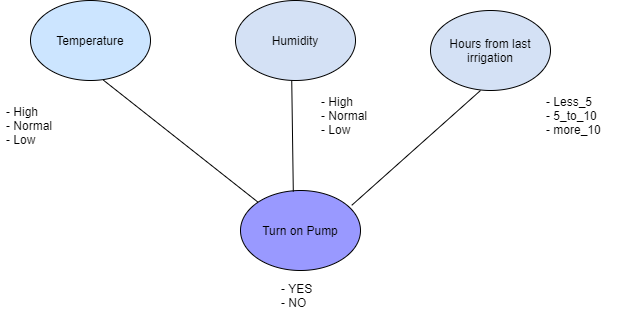

Since the dataset contains continue values, some transformation is needed


Case of sweet Pepper, The optimal average of  temperatures range between 20°C
to  25 °C.  Temperatures above 30 °C and below 15 °C can cause abortion, drop of flowers and will also affect the formation of the fruits.

In [3]:
dfWeather['DiscreteTemp']=dfWeather['temp'].apply(lambda x: 'Low'   if x<=15 else
                                                            'Normal' if 15<x<=30 else 'High')


The optimal humidity  is between 60% and 80%. High relative humidity can cause flower drop, malformation of the fruits, rot and incidence of diseases caused by fungi and bacteria

In [4]:
dfWeather['DiscreteHumidiy']=dfWeather['humidity'].apply(lambda x: 'Low'   if x<=60 else
                                                            'Normal' if 60<x<=80 else 'High')

In [5]:
dfWeather

date   zone  temp  humidity DiscreteTemp DiscreteHumidiy
0   2021-03-09 02:11:10  zona3  30.4      99.9         High            High
1   2021-03-09 02:11:35  zona3  22.1      68.5       Normal          Normal
2   2021-03-09 02:14:58  zona3  28.3      72.8       Normal          Normal
3   2021-03-09 02:16:33  zona3  27.4      55.3       Normal             Low
4   2021-03-09 02:25:34  zona3  22.0      75.2       Normal          Normal
5   2021-11-02 17:18:29  zona3  23.5      74.1       Normal          Normal
6   2021-11-02 17:28:53  zona3  23.4      74.9       Normal          Normal
7   2021-11-02 17:46:56  zona3  23.4      74.1       Normal          Normal
8   2021-11-02 17:48:26  zona3  23.4      74.6       Normal          Normal
9   2021-11-02 17:50:49  zona3  23.4      74.7       Normal          Normal
10  2021-11-02 17:55:24  zona3  23.3      74.9       Normal          Normal
11  2021-11-02 17:55:55  zona3  23.3      74.6       Normal          Normal


Hours since last irrigation, is taken from the last time when the pump was turn on, this value is saved into json parameters file.

## Implementation of the Bayesian network


In [33]:
import pandas as pd # for data manipulation 
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [34]:
df=pd.read_csv('ds_pump.csv', encoding='utf-8')

df

temperature humidity  HoursOff TurnOn
0          low      low    less_5     NO
1          low      low   5_to_10     NO
2          low      low   more_10    YES
3          low   normal    less_5     NO
4          low   normal   5_to_10     NO
5          low   normal   more_10    YES
6          low     high    less_5     NO
7          low     high   5_to_10     NO
8          low     high   more_10     NO
9       normal      low    less_5     NO
10      normal      low   5_to_10     NO
11      normal      low   more_10    YES
12      normal   normal    less_5     NO
13      normal   normal   5_to_10    YES
14      normal   normal   more_10    YES
15      normal     high    less_5     NO
16      normal     high   5_to_10     NO
17      normal     high   more_10    YES
18        high      low    less_5    YES
19        high      low   5_to_10    YES
20        high      low   more_10    YES
21        high   normal    less_5     NO
22        high   normal   5_to_10    YES
23        high   normal   more_10    YES
24        high     high    less_5     NO
25        high     high   5_to_10    YES
26        high     high   more_10    YES

### Utility Functions

In [35]:
def probs(data, child, parent1=None, parent2=None,parent3=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
                
                if parent3!=None:
                    prob=pd.crosstab([data[parent1],data[parent2],data[parent3]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob 

def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)# get probabilities for every note
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
def potential_to_series(potential):
    def get_entry_kv(entry):
        arr = [(k, v) for k, v in entry.entries.items()]
        arr = sorted(arr, key=lambda tup: tup[0])
        return arr[0][1], entry.value

    tups = [get_entry_kv(e) for e in potential.entries]
    return pd.Series([tup[1] for tup in tups], [tup[0] for tup in tups])

def GetTurnOnProbability():
    for node in join_tree.get_bbn_nodes():

            var=node.to_dict().get('variable')
            name=var.get('name')
            if (name=="TurnOn"):
                potential = join_tree.get_bbn_potential(node)
                #json = potential.to_dict
                s = potential_to_series(potential)
    return s[1]

In [36]:
probs(df, child='temperature')

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]

### Build the bayesian Network

In [49]:
temp = BbnNode(Variable(0, 'temperature', ['high','normal', 'low']), probs(df, child='temperature'))
humidity = BbnNode(Variable(1, 'humidity', ['high','normal', 'low']), probs(df, child='humidity'))
hoursOff = BbnNode(Variable(2, 'HoursOff', ['less_5', '5_to_10', 'more_10']), probs(df, child='HoursOff'))
TurnON = BbnNode(Variable(3, 'TurnOn', ['NO', 'YES']), 
                 probs(df, child='TurnOn', parent1='temperature', parent2='humidity',parent3='HoursOff'))

# Create Network
Bayesian_Network = Bbn() \
                    .add_node(temp) \
                    .add_node(humidity) \
                    .add_node(hoursOff) \
                    .add_node(TurnON) \
                    .add_edge(Edge(temp, TurnON, EdgeType.DIRECTED)) \
                    .add_edge(Edge(humidity, TurnON, EdgeType.DIRECTED)) \
                    .add_edge(Edge(hoursOff, TurnON, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(Bayesian_Network)


### Test the model with some evidences

In [50]:
evidence('ev1', 'temperature', 'high', 1.0)
evidence('ev2', 'humidity', 'high', 1.0)
evidence('ev3', 'HoursOff', 'more_10', 1.0)
# Print marginal probabilities
print_probs()

Node: 1|humidity|high,normal,low
Values:
1=high|1.00000
1=normal|0.00000
1=low|0.00000
----------------
Node: 2|HoursOff|less_5,5_to_10,more_10
Values:
2=less_5|0.00000
2=5_to_10|0.00000
2=more_10|1.00000
----------------
Node: 3|TurnOn|NO,YES
Values:
3=NO|0.00000
3=YES|1.00000
----------------
Node: 0|temperature|high,normal,low
Values:
0=high|1.00000
0=normal|0.00000
0=low|0.00000
----------------


In [51]:
evidence('ev1', 'temperature', 'normal', 1.0)
evidence('ev2', 'humidity', 'normal', 1.0)
evidence('ev3', 'HoursOff', 'less_5', 1.0)
# Print marginal probabilities
print_probs()

Node: 1|humidity|high,normal,low
Values:
1=high|0.00000
1=normal|1.00000
1=low|0.00000
----------------
Node: 2|HoursOff|less_5,5_to_10,more_10
Values:
2=less_5|1.00000
2=5_to_10|0.00000
2=more_10|0.00000
----------------
Node: 3|TurnOn|NO,YES
Values:
3=NO|1.00000
3=YES|0.00000
----------------
Node: 0|temperature|high,normal,low
Values:
0=high|0.00000
0=normal|1.00000
0=low|0.00000
----------------


In [52]:
evidence('ev1', 'temperature', 'high', 1.0)
evidence('ev2', 'humidity', 'normal', 1.0)
evidence('ev3', 'HoursOff', '5_to_10', 1.0)
# Print marginal probabilities
print_probs()

Node: 1|humidity|high,normal,low
Values:
1=high|0.33333
1=normal|0.33333
1=low|0.33333
----------------
Node: 2|HoursOff|less_5,5_to_10,more_10
Values:
2=less_5|0.00000
2=5_to_10|1.00000
2=more_10|0.00000
----------------
Node: 3|TurnOn|NO,YES
Values:
3=NO|0.66667
3=YES|0.33333
----------------
Node: 0|temperature|high,normal,low
Values:
0=high|1.00000
0=normal|0.00000
0=low|0.00000
----------------


### Get the Probability of turn on the Pump

In [53]:
turnOnProb = GetTurnOnProbability()

print(turnOnProb)

0.3333333333333333


### Save model for future use

In [56]:
Bbn.to_json(Bayesian_Network, path='bnlearn_model')

### Model: Calculate how much time the pump will be on

Bayesian network will determine if the pump needs to be on, now we need to know how much time, for this the dataset will have one more variable: vegetative stages

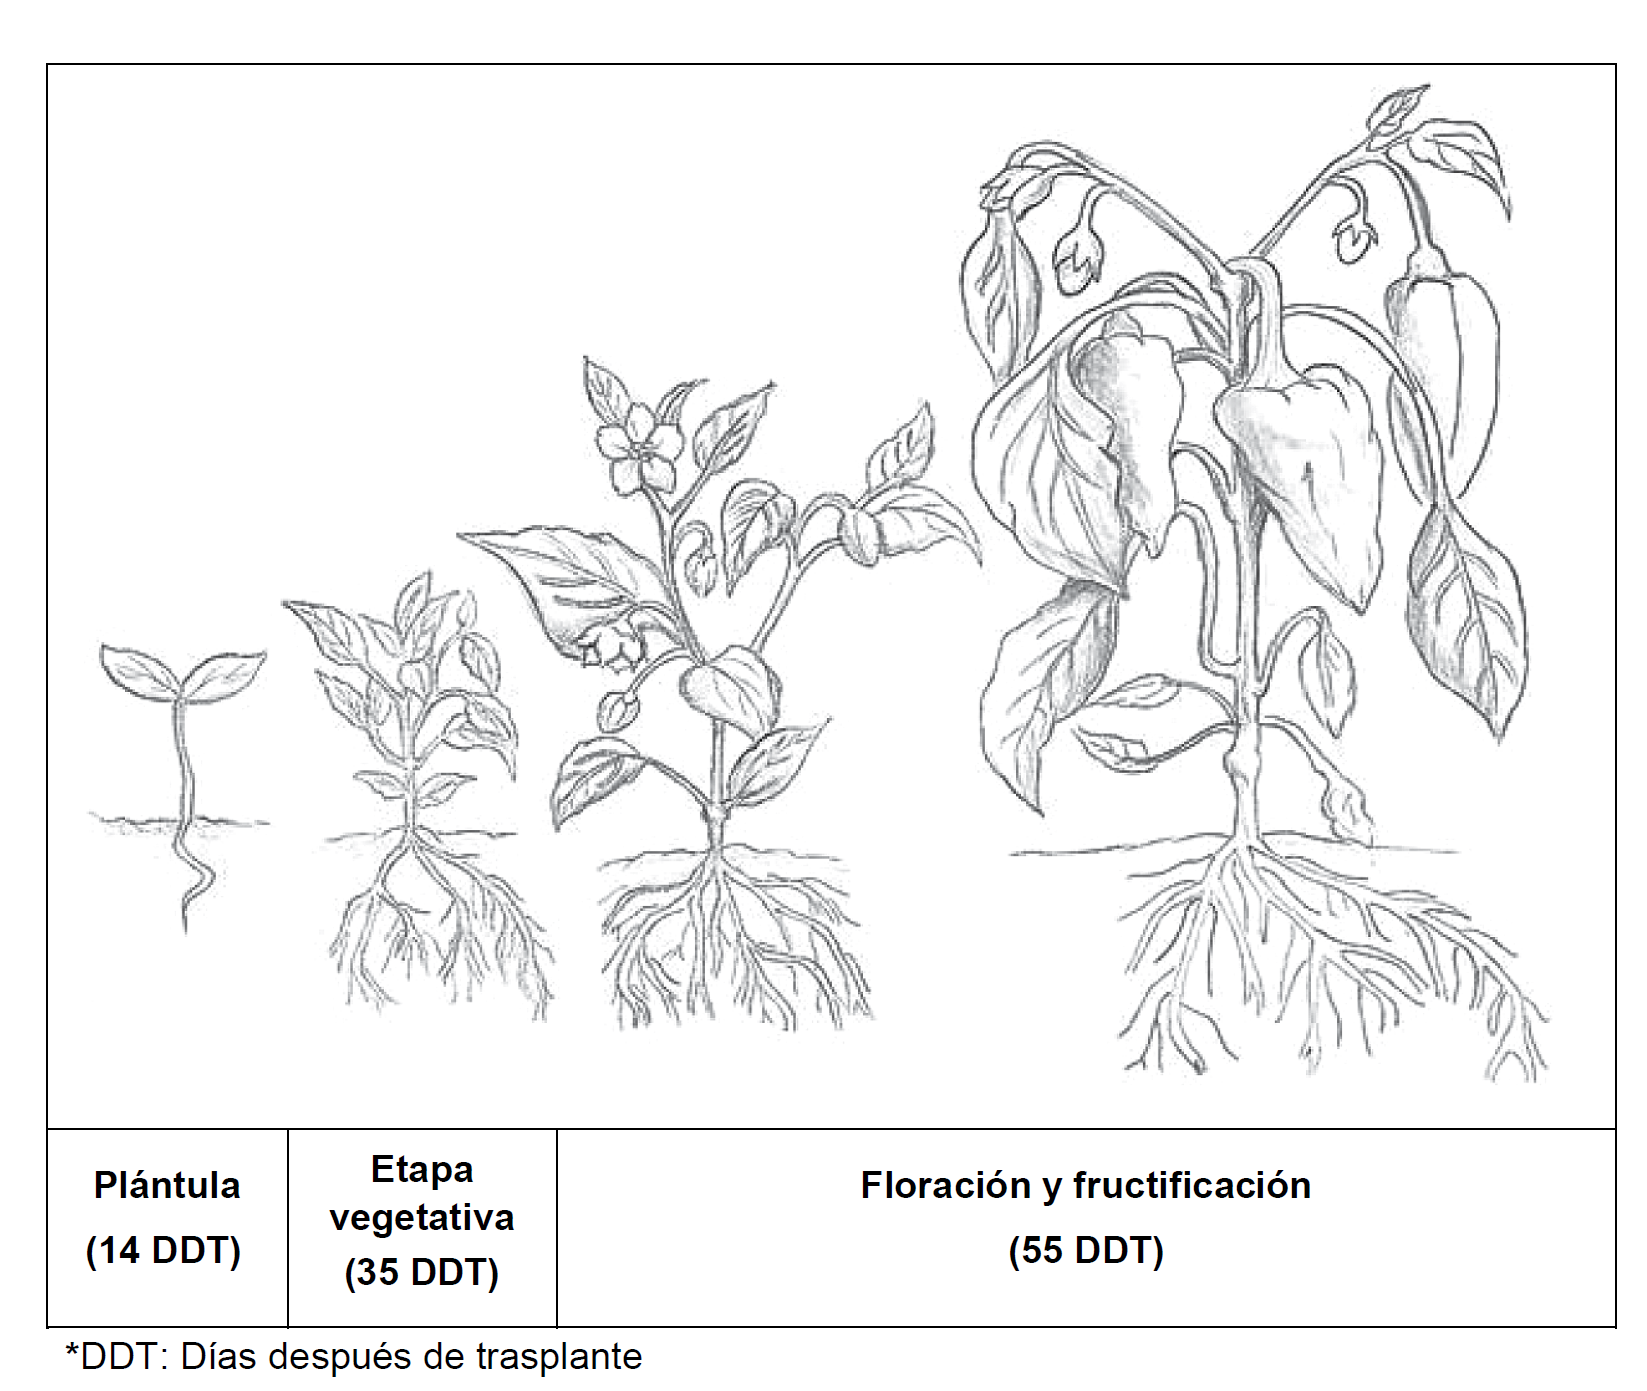

In [2]:
import pandas as pd
dfTurnOn=pd.read_csv('TurnOnTime.csv', encoding='utf-8')
dfTurnOn

temp  humidity  HoursOff  stage  time
0      3         3         1      1     0
1      3         3         1      2     0
2      3         3         1      3     0
3      3         3         2      1    10
4      3         3         2      2    12
..   ...       ...       ...    ...   ...
76     1         1         2      2    10
77     1         1         2      3    15
78     1         1         3      1     5
79     1         1         3      2    15
80     1         1         3      3    20

[81 rows x 5 columns]

Columns are coded like 3=High, 2=Normal, 1 = low


In [3]:
X = dfTurnOn[['temp','humidity','HoursOff','stage']]
y=dfTurnOn[['time']]

In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [5]:

data = {'temp':[2],
        'humidity':[2],
        'HoursOff':[2],
        'stage':[1]
       }
  
df = pd.DataFrame(data)

In [6]:
y_pred = regressor.predict(df)
y_pred[0]

5.0

### Save Model with Pickle

In [7]:
import pickle

# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'decision_tree_classifier.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(regressor, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()

### Raspberry tester  version

In [8]:
import os
import sys
import time
import pandas as pd
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController
import pickle
from sklearn.tree import DecisionTreeRegressor

#relay control
import RPi.GPIO as GPIO



Pin1=21#define 21 as a relay output

print("---------------------")

temp= sys.argv[1]
hum= sys.argv[1]
Hours= sys.argv[3]


def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)# get probabilities for every note
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')

        


def potential_to_series(potential):
    def get_entry_kv(entry):
        arr = [(k, v) for k, v in entry.entries.items()]
        arr = sorted(arr, key=lambda tup: tup[0])
        return arr[0][1], entry.value

    tups = [get_entry_kv(e) for e in potential.entries]
    return pd.Series([tup[1] for tup in tups], [tup[0] for tup in tups])

def GetTurnOnProbability():
    for node in join_tree.get_bbn_nodes():

            var=node.to_dict().get('variable')
            name=var.get('name')
            if (name=="TurnOn"):
                potential = join_tree.get_bbn_potential(node)
                #json = potential.to_dict
                s = potential_to_series(potential)
    return s[1]

def GetTurnOnTime():
    tmp=1
    humidity=1
    off=1
    cwd = os.getcwd()

    decision_tree_pkl_filename = 'decision_tree_classifier.pkl'
    store_path = os.path.join(cwd, decision_tree_pkl_filename)
    # Loading the saved decision tree model pickle
    decision_tree_model_pkl = open(store_path, 'rb')

    decision_tree_model = pickle.load(decision_tree_model_pkl)

    if (temp=="high"):
        tmp=3
    if (temp=="normal"):
        tmp=2
    if (temp=="low"):
        tmp=1

    if (hum=="high"):
        humidity=3
    if (hum=="normal"):
        humidity=2
    if (hum=="low"):
        humidity=1

    if (Hours=="more_10"):
        off=3
    if (Hours=="5_to_10"):
        off=2
    if (Hours=="less_5"):
        off=1
        
        

    data = {'temp':[tmp],
            'humidity':[humidity],
            'HoursOff':[off],
            'stage':[1]
           }

    df = pd.DataFrame(data)

    # make sure tha the model works
    y_pred = decision_tree_model.predict(df)
    return y_pred[0]


def turnOnRelay(Minutes):
    i=0
    Minutes=1
    while ((i<=Minutes) and (i<40)):
        print("digital write minute:{}".format(i))
        GPIO.output(Pin1,True)
        time.sleep(10)
        i += 1


#initiate Relay----------
GPIO.setmode(GPIO.BCM)
GPIO.setup(Pin1,GPIO.OUT)
#--------------------------


model = Bbn.from_json(path='bnlearn_model')
join_tree = InferenceController.apply(model)

join_tree_test = InferenceController.apply(model)
evidence('ev1', 'temperature', temp, 1.0)
evidence('ev2', 'humidity', hum, 1.0)
evidence('ev3', 'HoursOff', Hours, 1.0)



GPIO.output(Pin1,False)

turnOn = GetTurnOnProbability()

if (turnOn > 0.5):
    print("Ready to turn on")
    turnTime=GetTurnOnTime()
    print("turn on time:" + str(turnTime))
    turnOnRelay(turnTime)
else:
    GPIO.output(Pin1,False)
    print("continue off......")
    


C:\Users\wfc\Documents\IA\CENFOTEC\IA-04 G1 Agentes Inteligentes\proyecto\decision_tree_classifier.pkl
Open Model OK
Load Model OK
send params to predict
5.0


# Fertilizer injection

Venturi

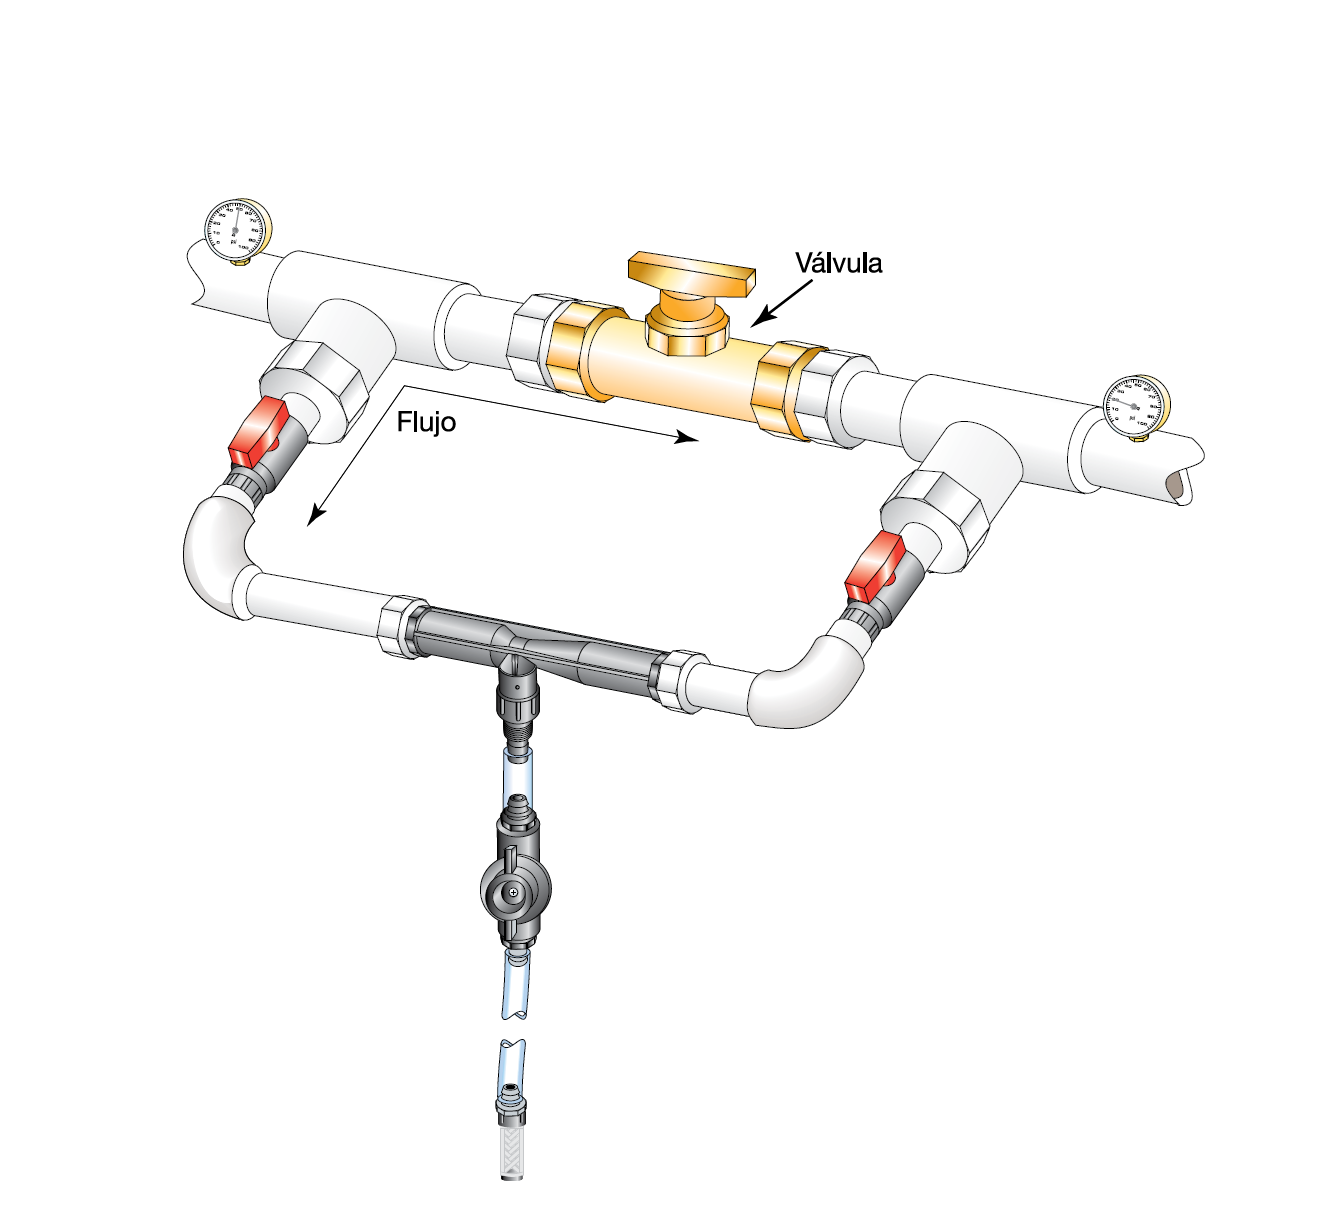

### Current agronomic design

The fertilizer injection is made through the difference of pressures generated by the venturi effect

A single tank contains the necessary nutrients

The fertilizer is injected 3 days a week

Manual process

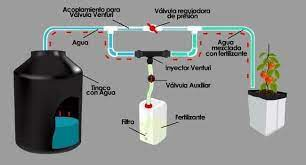

## Automatic System

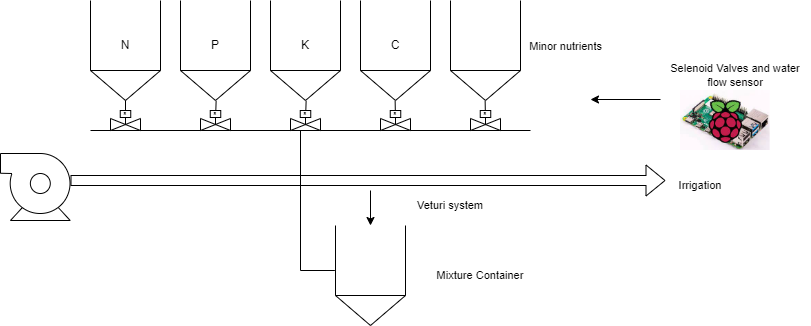

### Future task for this implementation

- Database for every type plantation, making mixture of nutrients depending of plant type and  stage 


- Calibration of the amount of fertilizer, how much time the valve needs to be open


- Automatic scheduler (days of the week for fertilization)


- Feedback of soil conductivity sensors


- Add water level sensors to the tanks 